In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from helper_functions import *

In [2]:
def MSE(est, tru):
    return np.mean(np.linalg.norm(est-tru,axis=1)**2)

## Part One
#### Approximating the linear vector field

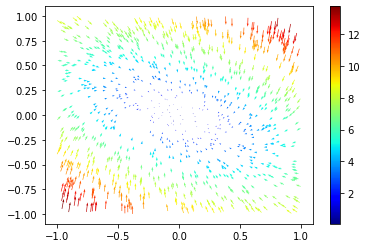

In [3]:
x0 = np.loadtxt('data/linear_vectorfield_data_x0.txt')
x1 = np.loadtxt('data/linear_vectorfield_data_x1.txt')
dt = 0.01
v = (x1 - x0)/dt
plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], np.linalg.norm(v,axis=1),cmap='jet')
plt.colorbar()

#### Approximating the matrix $A \in \mathbb{R}^{2x2}$

In [4]:
A_1 = np.matmul((x0.T),x0);
A_2 = np.linalg.inv(A_1)
A_3 = np.matmul(A_2,x0.T)
A_T = np.matmul(A_3,x1)
A = A_T.T

print(A)

[[ 0.95064476  0.02319115]
 [-0.04638232  0.90426243]]


## Part Two
#### Estimating value of $x_1^{(k)}$ by solving $\dot{x} =\hat{A}x $

In [6]:
x = x0
T_end = 0.1
t = 0
while t < T_end:
    x += x@A*dt
    t += dt
x1hat = x
MSE(x1hat, x1)

0.02329573821668306

## Part Three
#### Solving equation with initial point as (10,10)

In [15]:
x = [10, 10]
T_end = 100
t = 0
x_list = [[10,10]]
x_dot_list = [0]
while t < T_end:
    x_dot = x@A
    x += x_dot*dt
    t += dt
    x_list.append(x)
    x_dot_list.append(x_dot)
print(x_list)

[[10, 10], array([-1.75004800e+41, -8.23872892e+40]), array([-1.75004800e+41, -8.23872892e+40]), array([-1.75004800e+41, -8.23872892e+40]), array([-1.75004800e+41, -8.23872892e+40]), array([-1.75004800e+41, -8.23872892e+40]), array([-1.75004800e+41, -8.23872892e+40]), array([-1.75004800e+41, -8.23872892e+40]), array([-1.75004800e+41, -8.23872892e+40]), array([-1.75004800e+41, -8.23872892e+40]), array([-1.75004800e+41, -8.23872892e+40]), array([-1.75004800e+41, -8.23872892e+40]), array([-1.75004800e+41, -8.23872892e+40]), array([-1.75004800e+41, -8.23872892e+40]), array([-1.75004800e+41, -8.23872892e+40]), array([-1.75004800e+41, -8.23872892e+40]), array([-1.75004800e+41, -8.23872892e+40]), array([-1.75004800e+41, -8.23872892e+40]), array([-1.75004800e+41, -8.23872892e+40]), array([-1.75004800e+41, -8.23872892e+40]), array([-1.75004800e+41, -8.23872892e+40]), array([-1.75004800e+41, -8.23872892e+40]), array([-1.75004800e+41, -8.23872892e+40]), array([-1.75004800e+41, -8.23872892e+40]), 

In [ ]:
#Plotting the trajectory

Text(0.5, 1.0, '$x_0 = (10,10)$; $\\dot{x} =\\hat{A}x $')

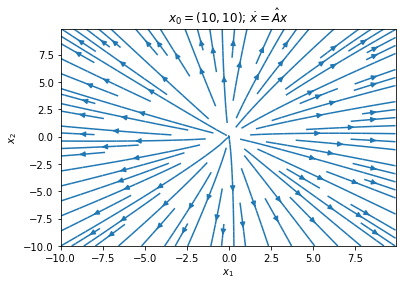

In [17]:
# Plotting the Phase portrait
xmin=-10.
xmax=10.
ymin=-10.
ymax=10.
X, Y = np.meshgrid(np.arange(xmin,xmax, 0.1), np.arange(ymin,ymax,0.1))
XY = np.array([X.flatten(), Y.flatten()])
AXY = np.matmul(A, XY)
U = AXY[0].reshape(X.shape)
V = AXY[1].reshape(Y.shape)
plt.figure()
plt.streamplot(X, Y, U, V)
#plt.plot(x_list[0],x_list[1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title(r'$x_0 = (10,10)$; $\dot{x} =\hat{A}x $')

In [ ]:
x0_1,x0_2 = load_to_numpy('linear_vectorfield_data_x0.txt')
x1_1,x1_2 = load_to_numpy('linear_vectorfield_data_x0.txt')
neu_1 = np.zeros(x0_1.shape)
neu_2 = np.zeros(x0_2.shape)
x0 = np.to_numpy([x0_1,x0_2])

for i in range(x0_1.shape[0]):
    neu_1[i] = x1_1[i] - x0_1[i]
    neu_2[i] = x1_2[i] - x0_2[i]

print(x0.shape)

    
#plt.scatter(x0_1, x0_2)
#plt.figure()
#plt.streamplot(x0_1,x0_2, neu_1, neu_2)